In [1]:
import pandas as pd
import numpy as np
import re
import time
from path import Path
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = Path('heart.csv')
heart_df = pd.read_csv(data)
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Rename columns and remove index numbers.
heart_df.columns = ['age', 'sex', 'chest_pain_rating', 'resting_blood_pressure', 'serum_cholesterol(mg/dl)', 
                   'fasting_blood_sugar', 'resting_ecg_results', 'max_heart_rate_achieved', 
                    'exercise_induced_angina',
                   'st_depression', 'st_slope_elevation', 'major_vessels', 'thal', 'heart_disease']
heart_df.head()

,age,sex,chest_pain_rating,resting_blood_pressure,serum_cholesterol(mg/dl),fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_elevation,major_vessels,thal,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Break heart_df into two populations (heart disease and no heart disease)
noHD_df= heart_df[heart_df["heart_disease"] == 0]
noHD_df

,age,sex,chest_pain_rating,resting_blood_pressure,serum_cholesterol(mg/dl),fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_elevation,major_vessels,thal,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0


In [5]:
HD_df = heart_df[heart_df["heart_disease"] == 1]
HD_df

,age,sex,chest_pain_rating,resting_blood_pressure,serum_cholesterol(mg/dl),fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_elevation,major_vessels,thal,heart_disease
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1


C:\Users\Ryann\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Cholesterol')

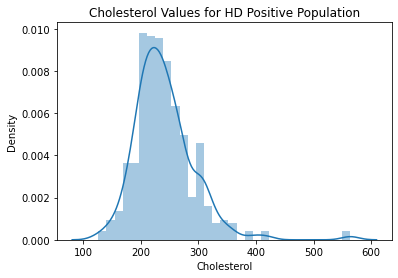

In [6]:
### DIFFERENT EXAMPLE FOR BELL CURVE ###
sns.distplot(HD_df["serum_cholesterol(mg/dl)"])
#sns.color_palette("rocket", as_cmap=True)
#plt.plot(color='green')
plt.title("Cholesterol Values for HD Positive Population")
plt.xlabel("Cholesterol")

C:\Users\Ryann\anaconda3\envs\PythonData\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'thal')

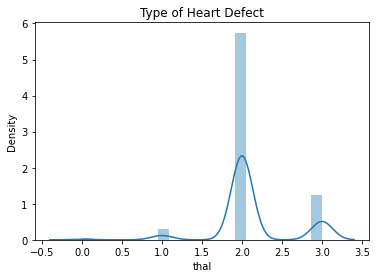

In [7]:
sns.distplot(HD_df["thal"])
plt.title("Type of Heart Defect")
plt.xlabel("thal")

In [8]:
HD_df.thal.unique()

array([2, 3, 1, 0], dtype=int64)

In [9]:
HD_df.value_counts("thal")

thal
2    412
3     90
1     21
0      3
dtype: int64

In [10]:
noHD_df.count()

age                         499
sex                         499
chest_pain_rating           499
resting_blood_pressure      499
serum_cholesterol(mg/dl)    499
fasting_blood_sugar         499
resting_ecg_results         499
max_heart_rate_achieved     499
exercise_induced_angina     499
st_depression               499
st_slope_elevation          499
major_vessels               499
thal                        499
heart_disease               499
dtype: int64

In [11]:
HD_df.count()

age                         526
sex                         526
chest_pain_rating           526
resting_blood_pressure      526
serum_cholesterol(mg/dl)    526
fasting_blood_sugar         526
resting_ecg_results         526
max_heart_rate_achieved     526
exercise_induced_angina     526
st_depression               526
st_slope_elevation          526
major_vessels               526
thal                        526
heart_disease               526
dtype: int64

In [12]:
noHD_df.dtypes

age                           int64
sex                           int64
chest_pain_rating             int64
resting_blood_pressure        int64
serum_cholesterol(mg/dl)      int64
fasting_blood_sugar           int64
resting_ecg_results           int64
max_heart_rate_achieved       int64
exercise_induced_angina       int64
st_depression               float64
st_slope_elevation            int64
major_vessels                 int64
thal                          int64
heart_disease                 int64
dtype: object

In [13]:
HD_df.dtypes

age                           int64
sex                           int64
chest_pain_rating             int64
resting_blood_pressure        int64
serum_cholesterol(mg/dl)      int64
fasting_blood_sugar           int64
resting_ecg_results           int64
max_heart_rate_achieved       int64
exercise_induced_angina       int64
st_depression               float64
st_slope_elevation            int64
major_vessels                 int64
thal                          int64
heart_disease                 int64
dtype: object

In [14]:
# Drop any missing values
noHD_df.dropna()

,age,sex,chest_pain_rating,resting_blood_pressure,serum_cholesterol(mg/dl),fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_elevation,major_vessels,thal,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0


In [15]:
len(noHD_df)

499

In [16]:
HD_df.dropna()

,age,sex,chest_pain_rating,resting_blood_pressure,serum_cholesterol(mg/dl),fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_elevation,major_vessels,thal,heart_disease
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1


In [17]:
len(HD_df)

526

In [18]:
stats_none_df = noHD_df.describe()
stats_none_df

,age,sex,chest_pain_rating,resting_blood_pressure,serum_cholesterol(mg/dl),fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_elevation,major_vessels,thal,heart_disease
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.0
mean,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078,0.0
std,7.908153,0.378059,0.908024,18.576736,49.558924,0.370945,0.544825,22.565235,0.498083,1.290956,0.568932,1.032108,0.685460,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.000000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.000000,284.000000,0.000000,1.000000,156.000000,1.000000,2.500000,2.000000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [19]:
stats_hd_df = HD_df.describe()
stats_hd_df

,age,sex,chest_pain_rating,resting_blood_pressure,serum_cholesterol(mg/dl),fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_elevation,major_vessels,thal,heart_disease
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.0
mean,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772,1.0
std,9.631804,0.495498,0.945881,16.112188,53.010345,0.342029,0.502109,19.096928,0.342029,0.771079,0.590295,0.871462,0.468949,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.500000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,265.750000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [20]:
# Drop binary value columns from stats' dataframes.
del stats_none_df["heart_disease"]
del stats_none_df["sex"]

del stats_hd_df["heart_disease"]
del stats_hd_df["sex"]

In [21]:
stats_none_df.round(2)

,age,chest_pain_rating,resting_blood_pressure,serum_cholesterol(mg/dl),fasting_blood_sugar,resting_ecg_results,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_elevation,major_vessels,thal
count,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00,499.00
mean,56.57,0.48,134.11,251.29,0.16,0.46,139.13,0.55,1.60,1.17,1.16,2.54
std,7.91,0.91,18.58,49.56,0.37,0.54,22.57,0.50,1.29,0.57,1.03,0.69
min,35.00,0.00,100.00,131.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00
25%,52.00,0.00,120.00,217.00,0.00,0.00,125.00,0.00,0.60,1.00,0.00,2.00
50%,58.00,0.00,130.00,249.00,0.00,0.00,142.00,1.00,1.40,1.00,1.00,3.00
75%,62.00,0.00,144.00,284.00,0.00,1.00,156.00,1.00,2.50,2.00,2.00,3.00
max,77.00,3.00,200.00,409.00,1.00,2.00,195.00,1.00,6.20,2.00,4.00,3.00


In [22]:
stats_hd_df = stats_hd_df.round(2)

In [23]:
del stats_hd_df["exercise_induced_angina"]
del stats_hd_df["st_slope_elevation"]
del stats_hd_df["resting_ecg_results"]
del stats_hd_df["fasting_blood_sugar"]

In [24]:
stats_hd_df

,age,chest_pain_rating,resting_blood_pressure,serum_cholesterol(mg/dl),max_heart_rate_achieved,st_depression,major_vessels,thal
count,526.00,526.00,526.00,526.00,526.00,526.00,526.00,526.00
mean,52.41,1.38,129.25,240.98,158.59,0.57,0.37,2.12
std,9.63,0.95,16.11,53.01,19.10,0.77,0.87,0.47
min,29.00,0.00,94.00,126.00,96.00,0.00,0.00,0.00
25%,44.00,1.00,120.00,208.00,149.00,0.00,0.00,2.00
50%,52.00,2.00,130.00,234.00,161.50,0.20,0.00,2.00
75%,59.00,2.00,140.00,265.75,172.00,1.00,0.00,2.00
max,76.00,3.00,180.00,564.00,202.00,4.20,4.00,3.00


In [25]:
# Potentially export these as csv files.
output_file_path = "HDStats_df.csv"
stats_hd_df.to_csv(output_file_path, index=True)

In [26]:
# Check for normal distribution of data.
# Code needed to plot the graph.
### EXAMPLE ###  ---- Unsure how to apply to DF
#norm.pdf(x=1.0, loc=0, scale=1)

#fig, ax = plt.subplots()
#x=np.arange(-4,4,0.001)
#ax.set_title('N(0,$1^2$)')
#ax.set_xlabel('x')
#ax.set_ylabel('f(x)')
#ax.plot(x, norm.pdf(x))
#ax.set_ylim(0,0.45)

#plt.show()

In [27]:
### DIFFERENT EXAMPLE FOR BELL CURVE ###
#sns.distplot(stats_none_df)

In [28]:
#modifiable_df = 